In [1]:
import pandas as pd
import numpy as np

In [8]:
from google.colab import files


# Upload the file
uploaded = files.upload()  # This opens a file dialog to upload

# Load the uploaded CSV file
X_data = pd.read_csv('vectorized_graphs.csv')  # Replace with your actual filename
print(X_data.head())


Saving vectorized_graphs.csv to vectorized_graphs (4).csv
   Edge_1  Edge_2  Edge_3  Edge_4  Edge_5  Edge_6  Edge_7  Edge_8  Edge_9  \
0       0       0       0       0       0       1       1       1       0   
1       0       0       0       0       1       1       1       1       0   
2       0       0       0       0       1       1       1       1       0   
3       0       0       0       0       1       1       1       1       0   
4       0       0       0       0       1       1       1       1       0   

   Edge_10  ...  Edge_27  Edge_28  Edge_29  Edge_30  Edge_31  Edge_32  \
0        0  ...        0        1        1        1        1        1   
1        0  ...        0        1        1        1        0        1   
2        0  ...        0        0        1        1        1        1   
3        0  ...        0        1        1        1        1        1   
4        0  ...        0        0        1        1        0        1   

   Edge_33  Edge_34  Edge_35  Edge_36  


In [ ]:
# Upload the file
uploaded = files.upload()  # This opens a file dialog to upload

# Load the uploaded CSV file
Y_data = pd.read_csv('rigidity_results.csv')  
print(Y_data.head())

Saving rigidity_results.csv to rigidity_results (2).csv
   Is_Rigid
0         1
1         1
2         0
3         1
4         0


In [10]:
# Concatenate the two DataFrames
dataset = pd.concat([X_data, Y_data], axis=1)
print(dataset.head())


   Edge_1  Edge_2  Edge_3  Edge_4  Edge_5  Edge_6  Edge_7  Edge_8  Edge_9  \
0       0       0       0       0       0       1       1       1       0   
1       0       0       0       0       1       1       1       1       0   
2       0       0       0       0       1       1       1       1       0   
3       0       0       0       0       1       1       1       1       0   
4       0       0       0       0       1       1       1       1       0   

   Edge_10  ...  Edge_28  Edge_29  Edge_30  Edge_31  Edge_32  Edge_33  \
0        0  ...        1        1        1        1        1        1   
1        0  ...        1        1        1        0        1        1   
2        0  ...        0        1        1        1        1        1   
3        0  ...        1        1        1        1        1        1   
4        0  ...        0        1        1        0        1        1   

   Edge_34  Edge_35  Edge_36  Is_Rigid  
0        1        1        1         1  
1        1      

In [11]:
from sklearn.model_selection import train_test_split

# Split the combined dataset into training and testing sets
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)


In [12]:
# Separate input (features) and output (target) for the training set
input_training = train_set.drop(['Is_Rigid'], axis=1).to_numpy()
output_training = train_set['Is_Rigid'].to_numpy()

# Separate input (features) and output (target) for the testing set
input_test = test_set.drop(['Is_Rigid'], axis=1).to_numpy()
output_test = test_set['Is_Rigid'].to_numpy()


In [13]:
# builiding model
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(32, activation="relu"),
 layers.Dense(32, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])

In [14]:
# compile model
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])

In [16]:
history = model.fit(input_training,
 output_training,
 epochs=30,
 batch_size=1000,
 validation_data=(input_test, output_test))


Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8881 - loss: 0.2873 - val_accuracy: 0.8785 - val_loss: 0.3071
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8909 - loss: 0.2816 - val_accuracy: 0.8935 - val_loss: 0.2977
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8910 - loss: 0.2782 - val_accuracy: 0.8956 - val_loss: 0.3010
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8950 - loss: 0.2725 - val_accuracy: 0.8860 - val_loss: 0.2939
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8947 - loss: 0.2726 - val_accuracy: 0.8931 - val_loss: 0.2867
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8948 - loss: 0.2696 - val_accuracy: 0.8974 - val_loss: 0.2826
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8990 - loss: 0.2630 - val_accuracy: 0.9022 - val_loss: 0.2768
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9039 - loss: 0.2529 - val_accuracy: 0.9036 - val_los

In [17]:
results = model.evaluate(input_test, output_test)

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9203 - loss: 0.2152


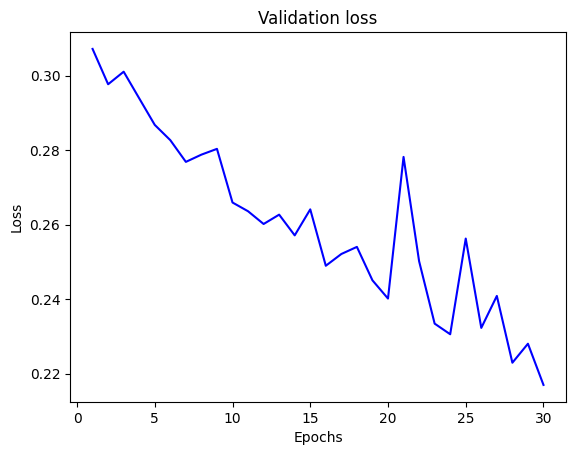

In [18]:
import matplotlib.pyplot as plt
val_loss = history.history["val_loss"]
epochs = range(1, len(val_loss) + 1)
plt.title("Validation loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()